## Task 1: Custom CNN Implementation for Image Classification (6 marks)‬
#### 1)Dataset Preparation‬:‬
* Load CIFAR-10 and split into training, validation, and test sets.‬
* Apply data augmentation (e.g., random horizontal flip).‬

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() # each of size (32, 32, 3)
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)


# create instance of the ImageDataGenerator class
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)


train_datagen.fit(x_train) # apply data augmentation


#### 2)Model Design‬:‬
* Define a CNN with the following layers:‬
    * 2 convolutional layers (number of kernels = 64, kernel size = 3x3, stride = 1,‬ padding = 1).‬
    * 2 max-pooling layers (kernel size = 2x2).‬
    * 1 fully connected layer (hidden layer) with (units = 128, dropout = 0.5).‬
    * Model architecture will be conv layer > pooling > conv layer > pooling > dense‬ layer > output layer‬
    * Use ReLU activation and batch normalization after each convolutional layer.‬

In [8]:
model_1 = models.Sequential()

model_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3))) #64 3x3 filters
model_1.add(layers.BatchNormalization())  # normalizes activations so they have a mean 0 and variance 1.
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.Dropout(0.5))  # Dropout layer with rate 0.5

model_1.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

# Compile the model
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model_1.fit(
    train_datagen.flow(x_train, y_train, batch_size=64),
    epochs=15,
    validation_data=(x_val, y_val)
)
y_pred_base = model_1.predict(x_test)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_acc}, Test loss : {test_loss}")

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.2773 - loss: 2.0725 - val_accuracy: 0.4721 - val_loss: 1.4653
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.4357 - loss: 1.5425 - val_accuracy: 0.5079 - val_loss: 1.4584
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.4978 - loss: 1.4026 - val_accuracy: 0.5864 - val_loss: 1.1735
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.5356 - loss: 1.3030 - val_accuracy: 0.6036 - val_loss: 1.1480
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.5695 - loss: 1.2251 - val_accuracy: 0.6125 - val_loss: 1.0755
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.5884 - loss: 1.1686 - val_accuracy: 0.5999 - val_loss: 1.1535
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.6081 - loss: 1.1269 - val_accuracy: 0.6517 - val_loss: 1.0345
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.6263 - loss: 1.0752 - val_accurac

#### 3)Hyperparameter tuning:‬
* Fine-tune the above model to find the optimal parameters that give the best performance.‬
    * Try with different numbers of‬ convolutional layers/kernels/max pooling‬ layers/dense layers/dense layer units‬
    * Try changing the activation functions/dropout rate/optimizer‬

In [11]:
tuned_model_1 = models.Sequential()

tuned_model_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
tuned_model_1.add(layers.BatchNormalization())
tuned_model_1.add(layers.MaxPooling2D((2, 2)))

tuned_model_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
tuned_model_1.add(layers.BatchNormalization())
tuned_model_1.add(layers.MaxPooling2D((2, 2)))

tuned_model_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
tuned_model_1.add(layers.BatchNormalization())
tuned_model_1.add(layers.MaxPooling2D((2, 2)))

tuned_model_1.add(layers.Flatten())

tuned_model_1.add(layers.Dense(128, activation='relu'))
tuned_model_1.add(layers.Dropout(0.3))

tuned_model_1.add(layers.Dense(10, activation='softmax'))

tuned_model_1.compile(optimizer='sgd',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



#### 4)Training‬:‬
* Train the model using the models before and after hyper-parameter tuning.‬
* Report training/validation accuracy and loss curves.‬


In [12]:
history_tuned = tuned_model_1.fit(
    train_datagen.flow(x_train, y_train, batch_size=64),
    epochs=15,
    validation_data=(x_val, y_val)
)

test_loss_tuned_1, test_acc_tuned_1 = tuned_model_1.evaluate(x_test, y_test, verbose=1)
y_pred_1 = tuned_model_1.predict(x_test)
print(f"Test accuracy: {test_acc_tuned_1}, Test loss : {test_loss_tuned_1}")

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.3479 - loss: 1.8905 - val_accuracy: 0.5091 - val_loss: 1.3641
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.5032 - loss: 1.3898 - val_accuracy: 0.5304 - val_loss: 1.3166
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5558 - loss: 1.2377 - val_accuracy: 0.5748 - val_loss: 1.2010
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.5879 - loss: 1.1532 - val_accuracy: 0.6226 - val_loss: 1.0665
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.6154 - loss: 1.0724 - val_accuracy: 0.6445 - val_loss: 1.0056
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6377 - loss: 1.0210 - val_accuracy: 0.6484 - val_loss: 0.9856
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.6565 - loss: 0.9645 - val_accuracy: 0.6691 - val_loss: 0.9377
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6764 - loss: 0.9205 - 

In [13]:
# Second tuned model with 4 convo layer and adam optimiser
tuned_model_2 = models.Sequential()

tuned_model_2.add(layers.Conv2D(64, (3, 3), activation='sigmoid', padding='same', input_shape=(32, 32, 3)))
tuned_model_2.add(layers.MaxPooling2D((2, 2)))

tuned_model_2.add(layers.Conv2D(64, (3, 3), activation='sigmoid', padding='same'))
tuned_model_2.add(layers.BatchNormalization())

tuned_model_2.add(layers.Conv2D(64, (3, 3), activation='sigmoid', padding='same'))
tuned_model_2.add(layers.BatchNormalization())
tuned_model_2.add(layers.MaxPooling2D((2, 2)))


tuned_model_2.add(layers.Conv2D(64, (3, 3), activation='sigmoid', padding='same'))
tuned_model_2.add(layers.BatchNormalization())
tuned_model_2.add(layers.MaxPooling2D((2, 2)))

tuned_model_2.add(layers.Flatten())

tuned_model_2.add(layers.Dense(128, activation='sigmoid'))
tuned_model_2.add(layers.Dropout(0.3))

# Output layer with softmax activation for multi-class classification
tuned_model_2.add(layers.Dense(10, activation='softmax'))

tuned_model_2.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
history_tuned_2 = tuned_model_2.fit(
    train_datagen.flow(x_train, y_train, batch_size=64),
    epochs=15,
    validation_data=(x_val, y_val)
)
y_pred_2 = tuned_model_2.predict(x_test)

test_loss_tuned_2, test_acc_tuned_2 = tuned_model_2.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_acc_tuned_2}, test loss: {test_loss_tuned_2}")

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.3120 - loss: 1.8916 - val_accuracy: 0.3734 - val_loss: 1.7146
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5085 - loss: 1.3747 - val_accuracy: 0.3068 - val_loss: 2.0087
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5698 - loss: 1.2038 - val_accuracy: 0.3219 - val_loss: 1.9842
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6136 - loss: 1.0873 - val_accuracy: 0.4083 - val_loss: 2.0153
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6443 - loss: 1.0135 - val_accuracy: 0.4614 - val_loss: 1.5736
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.6654 - loss: 0.9453 - val_accuracy: 0.6000 - val_loss: 1.1646
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.6807 - loss: 0.9095 - val_accuracy: 0.5913 - val_loss: 1.2225
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.6952 - loss: 0.8657 - val_accurac

#### 5)Evaluation‬:‬
* Compute test accuracy.‬
* Compare the performance between models before and after tuning.‬
* Plot confusion matrix and classification report.‬

Test accuracy model 2 : 0.6470000147819519, test loss 1.0012916326522827
Test accuracy model 1: 0.7301999926567078, test loss 0.7753666639328003
Test accuracy base model: 0.6148999929428101, test loss 1.0925586223602295
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 161ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


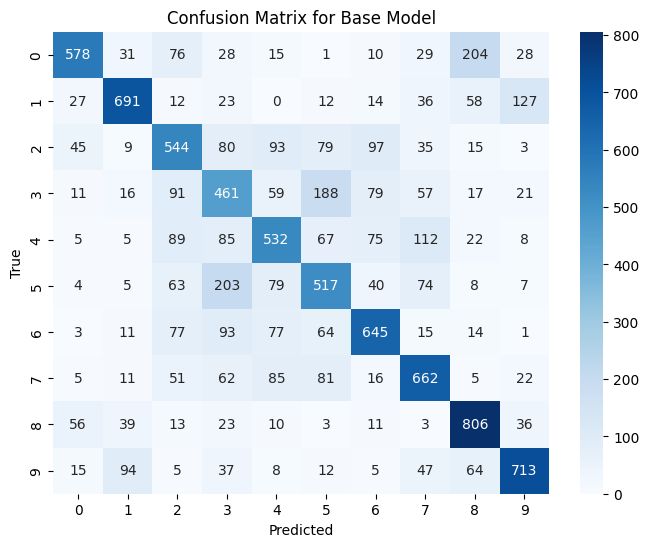

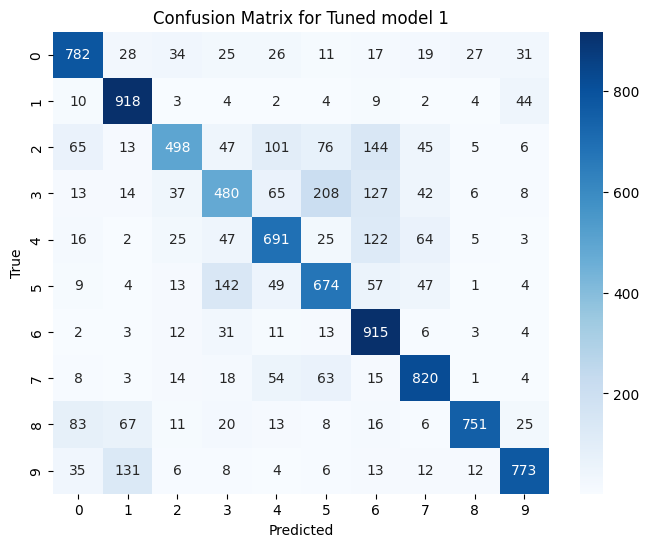

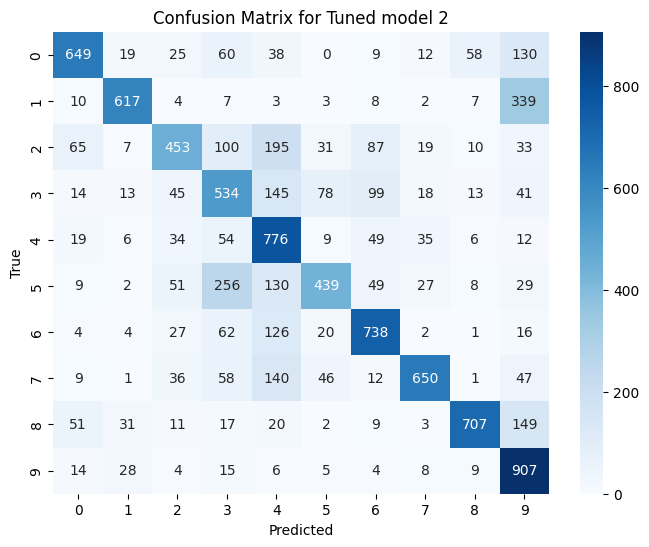

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate both the base and tuned models on the test set
print(f"Test accuracy model 2 : {test_acc_tuned_2}, test loss {test_loss_tuned_2}")
print(f"Test accuracy model 1: {test_acc_tuned_1}, test loss {test_loss_tuned_1}")
print(f"Test accuracy base model: {test_acc}, test loss {test_loss}")

y_pred_base = np.argmax(model.predict(x_test), axis=1)
conf_matrix_base = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_base, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix for Base Model')
plt.xlabel('Predicted')
plt.ylabel('True')

y_pred_1 = np.argmax(tuned_model_1.predict(x_test), axis=1)
conf_matrix_tune_1 = confusion_matrix(y_test, y_pred_1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tune_1, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix for Tuned model 1')
plt.xlabel('Predicted')
plt.ylabel('True')

y_pred_2 = np.argmax(tuned_model_2.predict(x_test), axis=1)
conf_matrix_tune_2 = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tune_2, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix for Tuned model 2')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Task 2: Transfer Learning with Pre-trained Architectures (2 marks)‬
#### 1)Data Preparation‬:‬
* Load the dataset and split into train/validation/test sets.‬
* Resize images to match the input size of the pre-trained model.‬


In [16]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)


#### 2)Model Setup‬:‬
* Load a pre-trained model from keras.‬
* Replace the final fully connected layer accordingly.‬
* Freeze all layers except the final classification layer.‬
#### 3)Training‬:‬
* Train only the unfrozen layers.‬
‬

In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load pre-trained VGG16 model without the fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers except the last classification layer
for layer in base_model.layers:
    layer.trainable = False

# Build the model on top of the pre-trained VGG16 base
model = models.Sequential()
model.add(layers.Resizing(224, 224))  # Resize to 224x224
# Add the pre-trained VGG16 base
model.add(base_model)

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu')) #Classification layer
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history_pretrained = model.fit(
    x_train,y_train,
    epochs=10,
    validation_data=(x_val, y_val)
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 260s 206ms/step - accuracy: 0.2822 - loss: 1.9910 - val_accuracy: 0.4891 - val_loss: 1.4973
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 291s 230ms/step - accuracy: 0.4452 - loss: 1.5506 - val_accuracy: 0.5434 - val_loss: 1.3227
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 322s 230ms/step - accuracy: 0.4927 - loss: 1.4190 - val_accuracy: 0.5668 - val_loss: 1.2474
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 322s 230ms/step - accuracy: 0.5134 - loss: 1.3719 - val_accuracy: 0.5784 - val_loss: 1.2041
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 322s 230ms/step - accuracy: 0.5276 - loss: 1.3202 - val_accuracy: 0.5852 - val_loss: 1.1733
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 322s 230ms/step - accuracy: 0.5499 - loss: 1.2768 - val_accuracy: 0.5992 - val_loss: 1.1300
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 322s 230ms/step - accuracy: 0.5560 - loss: 1.2491 - val_accuracy: 0.6104 - val_loss: 1.1236
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 322s 230ms/step - ac

#### 4)Analysis‬:‬
* Compare test accuracy with your custom CNN from Task 1.‬
* Discuss why the pre-trained model performs better/worse.

313/313 - 52s - 165ms/step - accuracy: 0.6235 - loss: 1.0736
Pre-trained Model Test Accuracy: 0.6235
313/313 - 1s - 2ms/step - accuracy: 0.7302 - loss: 0.7754
Custom CNN Model Test Accuracy: 0.7302


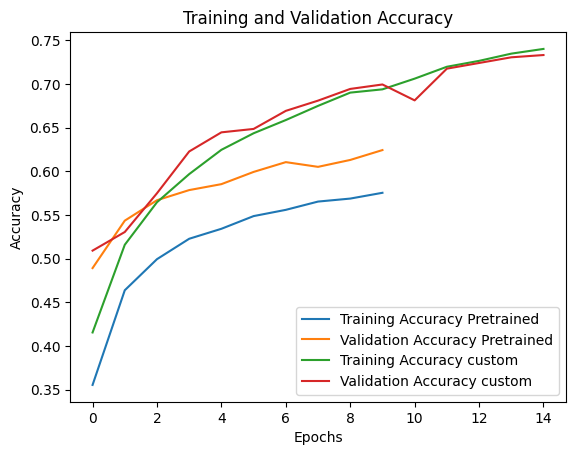

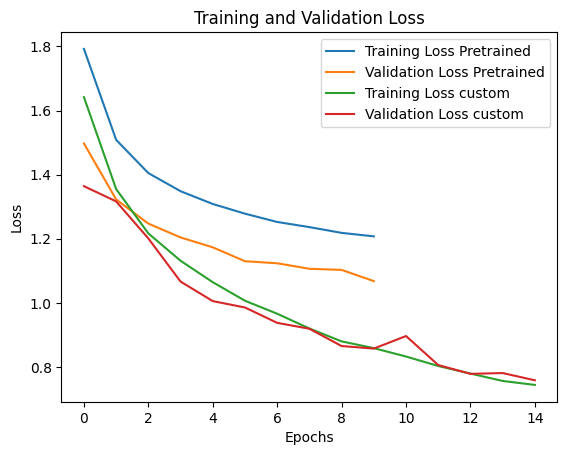

In [20]:
# Evaluate pre-trained model
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)
print(f"Pre-trained Model Test Accuracy: {test_acc:.4f}")

# evaluate custom CNN
test_loss_base, test_acc_base = tuned_model_1.evaluate(x_test,y_test, verbose=2)
print(f"Custom CNN Model Test Accuracy: {test_acc_base:.4f}")


plt.plot(history_pretrained.history['accuracy'], label='Training Accuracy Pretrained')
plt.plot(history_pretrained.history['val_accuracy'], label='Validation Accuracy Pretrained')
plt.plot(history_tuned.history['accuracy'], label='Training Accuracy custom')
plt.plot(history_tuned.history['val_accuracy'], label='Validation Accuracy custom')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_pretrained.history['loss'], label='Training Loss Pretrained')
plt.plot(history_pretrained.history['val_loss'], label='Validation Loss Pretrained')
plt.plot(history_tuned.history['loss'], label='Training Loss custom')
plt.plot(history_tuned.history['val_loss'], label='Validation Loss custom')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Task 3: Visualizing Model Decisions with Grad-CAM (2 marks)‬
#### 1)Grad-CAM Implementation‬:‬
* Extract feature maps from the last convolutional layer of your custom CNN.‬
* Compute gradients of the predicted class score with respect to these feature maps.‬
* Generate a heatmap by combining the feature maps and gradients.‬
#### 2)Visualization‬:‬
* Overlay the heatmap on 5 test images from the given dataset.‬
* Compare regions highlighted by Grad-CAM with the actual objects in the images.

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Model
for layer in tuned_model_1.layers:
    print(f"Layer name: {layer.name}")
dummy_input = np.random.random((1, 224, 224, 3))  # Adjust shape as needed
tuned_model_1.predict(dummy_input)  # Run a dummy pass to build the model

# Extract feature maps from the last convolutional layer
last_conv_layer = tuned_model_1.get_layer('conv2d_7')  # The last convolutional layer in your model

# Create a model to get the feature maps and predictions (including Gradients)
grad_model = Model(inputs=tuned_model_1.input, outputs=[last_conv_layer.output, dense_9.output])

# Compute the gradients of the predicted class score w.r.t the feature maps
def compute_gradcam(input_image, class_index):
    with tf.GradientTape() as tape:
        # Watch the image for gradient computation
        tape.watch(input_image)

        # Get the feature maps and the model predictions
        feature_maps, predictions = grad_model(input_image)

        # Get the class score (logits)
        class_score = predictions[:, class_index]

    # Compute the gradients of the class score w.r.t the feature maps
    grads = tape.gradient(class_score, feature_maps)
    return feature_maps, grads

# Process the gradients to create the heatmap
def generate_gradcam_heatmap(feature_maps, grads):
    # Compute the weights of each feature map by averaging the gradients
    weights = tf.reduce_mean(grads, axis=(0, 1, 2))  # Mean over width, height, and channels

    # Compute the weighted sum of feature maps
    grad_cam_output = tf.reduce_sum(tf.multiply(weights, feature_maps), axis=-1)

    # Apply ReLU to only keep positive activations
    grad_cam_output = tf.maximum(grad_cam_output, 0)

    # Normalize the heatmap
    grad_cam_output = grad_cam_output / tf.reduce_max(grad_cam_output)

    return grad_cam_output

# Visualize the heatmap on top of the image
def overlay_heatmap(image, heatmap):
    # Resize the heatmap to the same size as the image
    heatmap = tf.image.resize(heatmap, (image.shape[1], image.shape[2]))
    heatmap = heatmap.numpy()

    # Apply a colormap to the heatmap
    heatmap = plt.cm.jet(heatmap)[:, :, :3]  # Convert to RGB
    heatmap = tf.convert_to_tensor(heatmap)

    # Overlay the heatmap on top of the image
    overlayed_image = 0.5 * image + 0.5 * heatmap
    return overlayed_image

# Generate and plot Grad-CAM for 5 test images
def generate_and_plot_gradcam(test_images, test_labels, num_images=5):
    for i in range(num_images):
        image = tf.convert_to_tensor(test_images[i:i+1])  # Add batch dimension
        label = test_labels[i:i+1]
        class_index = np.argmax(label)  # Get the predicted class index

        # Compute Grad-CAM
        feature_maps, grads = compute_gradcam(image, class_index)
        heatmap = generate_gradcam_heatmap(feature_maps[0], grads[0])

        # Get the original image
        original_image = test_images[i]

        # Overlay the heatmap on the original image
        overlayed_image = overlay_heatmap(original_image, heatmap)

        # Plot the original image and the Grad-CAM heatmap
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(original_image)
        plt.title(f'Original Image {i+1}')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(overlayed_image)
        plt.title(f'Grad-CAM {i+1}')
        plt.axis('off')

        plt.show()

# Test with the first 5 images from your test set (you can modify this as needed)
generate_and_plot_gradcam(x_test, y_test, num_images=5)


Layer name: conv2d_5
Layer name: batch_normalization_5
Layer name: max_pooling2d_5
Layer name: conv2d_6
Layer name: batch_normalization_6
Layer name: max_pooling2d_6
Layer name: conv2d_7
Layer name: batch_normalization_7
Layer name: max_pooling2d_7
Layer name: flatten_2
Layer name: dense_8
Layer name: dropout_4
Layer name: dense_9


InvalidArgumentError: Graph execution error:

Detected at node sequential_4_1/flatten_2_1/Reshape defined at (most recent call last):
<stack traces unavailable>
only one input size may be -1, not both 0 and 1

Stack trace for op definition: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 619, in start
File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start
File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 699, in <lambda>
File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 750, in _run_callback
File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 824, in inner
File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 785, in run
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper
File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "<ipython-input-27-8982f3a4e173>", line 8, in <cell line: 0>
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 562, in predict
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 259, in one_step_on_data_distributed
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 249, in one_step_on_data
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 104, in predict_step
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 213, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 182, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 637, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py", line 54, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/numpy.py", line 4868, in reshape
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/numpy.py", line 1915, in reshape

	 [[{{node sequential_4_1/flatten_2_1/Reshape}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_841599[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_841646]